# Análisis de datos
# Tarea 4
## Ana Isabel Moreno Hernández
### NUA: 434232

## **Estadística y probabilidad I**

In [38]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import os
import math
import scipy.stats
%matplotlib inline
plt.style.use('seaborn-whitegrid')

### **Gaussiana**

Utilizamos scipy para graficar la gaussiana, aunque también puede hacerse la distribución normal con una ecuación.

En la siguiente gráfica se mostrarán algunas distribuciones gaussianas, con medias y desviaciones estándar diferentes. 

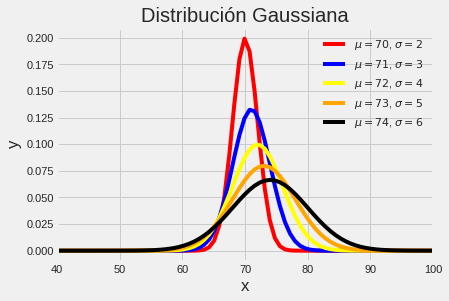

In [90]:
x_min = 40
x_max = 120

mean = 70
std = 2.0

color = ['red', 'blue', 'yellow', 'orange', 'black']
labels = ['$\mu = 70$, $\sigma = 2$', '$\mu = 71$, $\sigma = 3$', '$\mu = 72$, $\sigma = 4$',
          '$\mu = 73$, $\sigma = 5$', '$\mu = 74$, $\sigma = 6$']
for i in range(5):
    x = np.linspace(x_min, x_max, 100)
    y = scipy.stats.norm.pdf(x,mean+i,std+i)
    plt.plot(x,y,'-', color = color[i], markersize = 2, label = labels[i])

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.xlim(40,100)
plt.title('Distribución Gaussiana')
plt.grid(True)

Y para graficar la distribución acumulada también hacemos uso de scipy. En códigos siguientes se mostrará cómo graficarlas sin utilizar scipy.

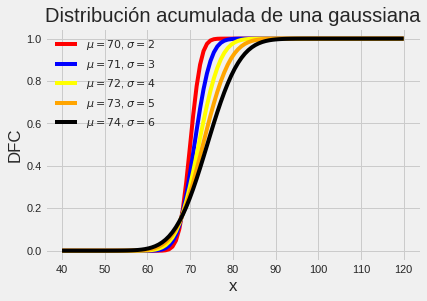

In [94]:
for i in range(5):
    x = np.linspace(x_min, x_max, 100)
    y_ac = scipy.stats.norm.cdf(x,mean+i,std+i)
    plt.plot(x,y_ac,'-', color = color[i], markersize = 2, label = labels[i])

plt.xlabel('x')
plt.ylabel('DFC')
plt.legend()
plt.title('Distribución acumulada de una gaussiana')
plt.grid(True)

En este caso, se analizará la distribución gaussiana con media igual a 70 y desviación estándar igual a 2.

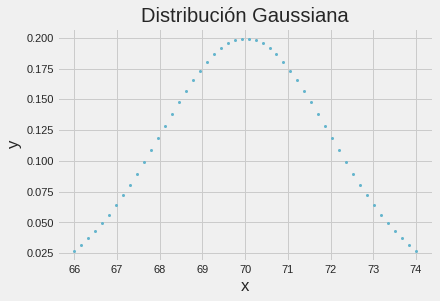

In [77]:
x_min = 66
x_max = 74

mean = 70
std = 2.0

x = np.linspace(x_min, x_max, 50)
y = scipy.stats.norm.pdf(x,mean,std)

plt.plot(x,y,'oc', markersize = 2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distribución Gaussiana')
plt.grid(True)

Y la distribución acumulada correspondiente es:

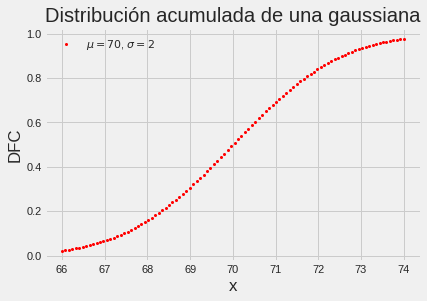

In [98]:
x_min = 66
x_max = 74

x = np.linspace(x_min, x_max, 100)
y_ac = scipy.stats.norm.cdf(x,mean,std)
plt.plot(x,y_ac,'o', color = color[0], markersize = 2, label = labels[0])

plt.xlabel('x')
plt.ylabel('DFC')
plt.legend()
plt.title('Distribución acumulada de una gaussiana')
plt.grid(True)

Ahora graficamos x contra la frecuencia acumulada. 

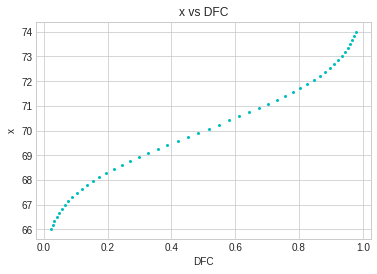

In [4]:
plt.plot(y_ac,x,'oc', markersize = 2)
plt.xlabel('DFC')
plt.ylabel('x')
plt.title('x vs DFC')
plt.grid(True)

Interpolamos para encontrar valores de x distintos a los de la primer gráfica utilizando interpolate.interp1d de scipy. En la gráfica se muestra los puntos que resultaron de interpolar y se observa claramente que son distintos a los de la gráfica anterior. 

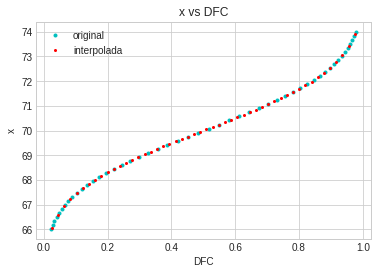

In [5]:
f = scipy.interpolate.interp1d(y_ac, x)
y_new = np.linspace(0.025,0.975,50)

x_new = f(y_new)

plt.plot(y_ac,x,'oc', markersize = 3, label = 'original')
plt.plot(y_new,x_new,'or',markersize = 2, label = 'interpolada')
plt.xlabel('DFC')
plt.legend()
plt.ylabel('x')
plt.title('x vs DFC')
plt.grid(True)

Y si hacemos un histograma con los valores nuevos de x, debemos obtener una distribución gaussiana otra vez.

Text(0, 0.5, 'Frecuencia')

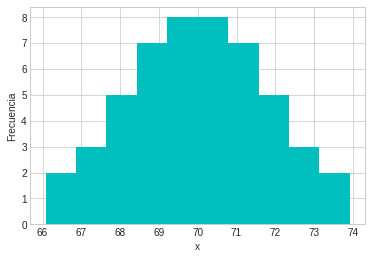

In [6]:
plt.hist(x_new, color = 'c');
plt.xlabel('x')
plt.ylabel('Frecuencia')

Utilizando seaborn, el histograma luce así:

Text(0, 0.5, 'y')

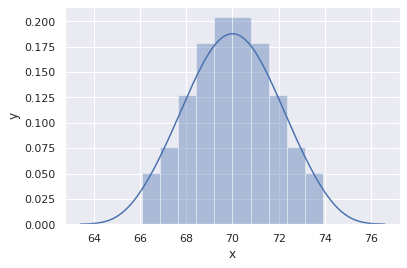

In [7]:
import seaborn as sns
sns.set()

sns.distplot(x_new, bins = 10)
plt.xlabel('x')
plt.ylabel('y')

Ahora, si en lugar de obtener la distribución gaussiana con scipy la obtenemos utilizando la función de probabilidades, tenemos lo siguiente:

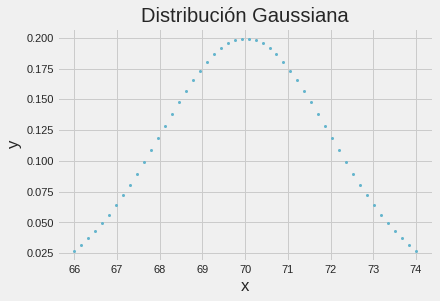

In [99]:
x_min = 66
x_max = 74

mean = 70
std = 2.0

x = np.linspace(x_min, x_max, 50)
y = (1/(std*(2*np.pi)**0.5))*np.exp(-(x-mean)**2/(2*std**2))

plt.plot(x,y,'oc', markersize = 2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distribución Gaussiana')
plt.grid(True)

Y para obtener la distribución acumulada basta con hacer el siguiente ciclo:

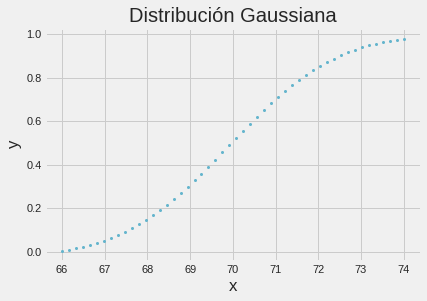

In [103]:
y_ac = np.zeros(50)

y_ac[0] = y[0]
for i in range(49):
    y_ac[i+1] = y_ac[i] + y[i+1]
 
y_ac = y_ac/6
plt.plot(x,y_ac,'oc', markersize = 2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distribución Gaussiana')
plt.grid(True)

### **Distribución de Poisson**

Graficamos diferentes distribuciones de Poisson, tomando en cuenta que los valores de x deben ser enteros:]

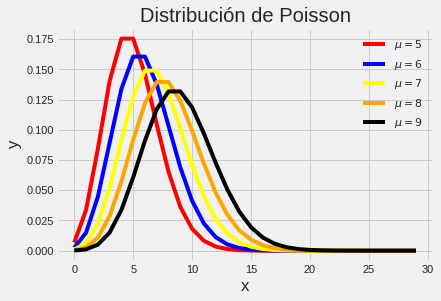

In [106]:
x_min = 0
x_max = 29

mu = 5

color = ['red', 'blue', 'yellow', 'orange', 'black']
labels = ['$\mu = 5$', '$\mu = 6$', '$\mu = 7$',
          '$\mu = 8$', '$\mu = 9$']
for i in range(5):
    x = np.linspace(x_min, x_max, 30)
    y = scipy.stats.poisson.pmf(x,mu + i)
    plt.plot(x,y,'-', color = color[i], markersize = 2, label = labels[i])

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Distribución de Poisson')
plt.grid(True)

Y la distribución acumulada correspondiente es:

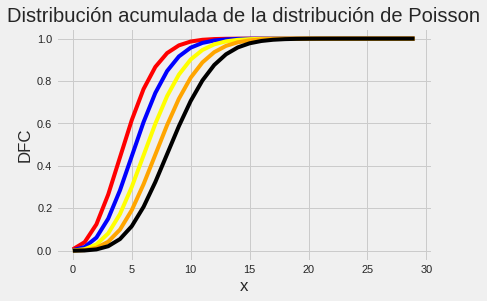

In [108]:
for i in range(5):
    x = np.linspace(x_min, x_max, 30)
    y_ac = scipy.stats.poisson.cdf(x,mu + i)
    plt.plot(x,y_ac,'-', color = color[i], markersize = 2, label = labels[i])

plt.xlabel('x')
plt.ylabel('DFC')
plt.title('Distribución acumulada de la distribución de Poisson')
plt.grid(True)

En este caso, analizaremos la distribución de poisson con $\mu = 5$:

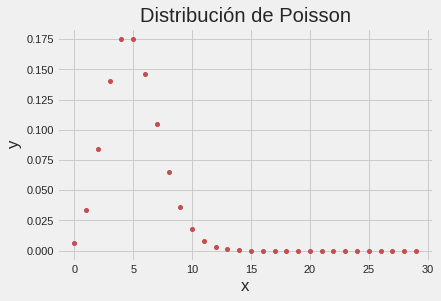

In [110]:
x_min = 0
x_max = 29

mu = 5

x = np.linspace(x_min, x_max, 30)
y = scipy.stats.poisson.pmf(x, mu)

plt.plot(x,y,'or', markersize = 4)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distribución de Poisson')
plt.grid(True)

Y ahora graficamos la distribución acumulada:

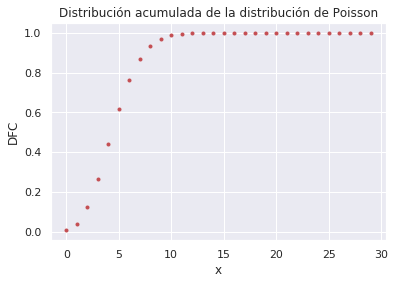

In [11]:
y_ac = scipy.stats.poisson.cdf(x, mu)
plt.plot(x,y_ac,'or', markersize = 3)
plt.xlabel('x')
plt.ylabel('DFC')
plt.title('Distribución acumulada de la distribución de Poisson')
plt.grid(True)

Y x contra la frecuencia acumulada se ve como:

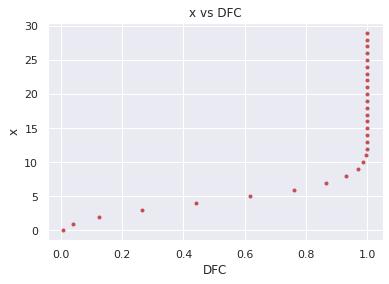

In [12]:
plt.plot(y_ac,x,'or', markersize = 3)
plt.xlabel('DFC')
plt.ylabel('x')
plt.title('x vs DFC')
plt.grid(True)

Interpolamos como lo hicimos con la distribución gaussiana y graficamos los puntos interpolados y los puntos originales en la misma gráfica.

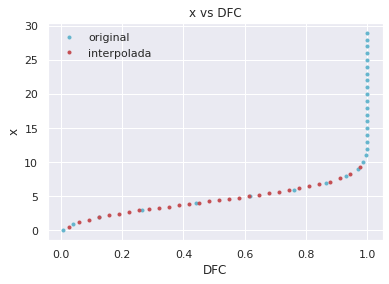

In [13]:
f = scipy.interpolate.interp1d(y_ac, x)
y_new = np.linspace(0.025,0.975,30)

x_new = f(y_new)

plt.plot(y_ac,x,'oc', markersize = 3, label = 'original')
plt.plot(y_new,x_new,'or',markersize = 3, label = 'interpolada')
plt.xlabel('DFC')
plt.legend()
plt.ylabel('x')
plt.title('x vs DFC')
plt.grid(True)

Y al plotear el histograma de los puntos obtenidos en la interpolación, la gráfica que se obtiene tiene una distribución de Poisson.

Text(0, 0.5, 'y')

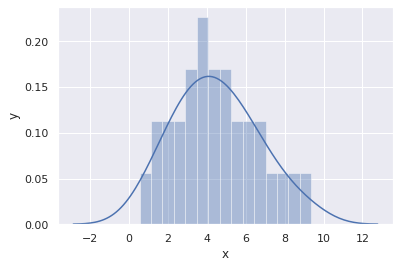

In [14]:
sns.distplot(x_new, bins = 15)
plt.xlabel('x')
plt.ylabel('y')

### **Distribución beta**

Graficamos algunas distribuciones Beta, utilizando scipy:

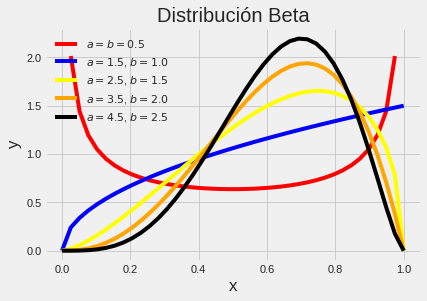

In [131]:
x_min = 0
x_max = 1

a = 0.5
b = 0.5

color = ['red', 'blue', 'yellow', 'orange', 'black']
labels = ['$a = b = 0.5$', '$a = 1.5$, $b = 1.0$', '$a = 2.5$, $b = 1.5$',
          '$a = 3.5$, $b = 2.0$', '$a = 4.5$, $b = 2.5$']
for i in range(5):
    x = np.linspace(x_min, x_max, 40)
    y = scipy.stats.beta.pdf(x,a+i,b*i+0.5)
    plt.plot(x,y,'-', color = color[i], markersize = 2, label = labels[i])

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Distribución Beta')
plt.grid(True)

Y las correspondientes distribuciones acumuladas son:

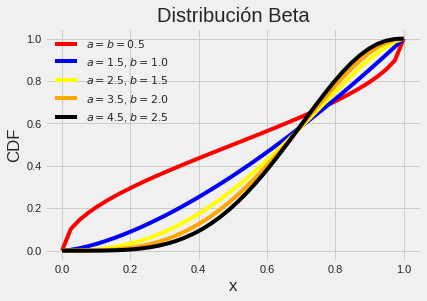

In [132]:
for i in range(5):
    x = np.linspace(x_min, x_max, 40)
    y = scipy.stats.beta.cdf(x,a+i,b*i+0.5)
    plt.plot(x,y,'-', color = color[i], markersize = 2, label = labels[i])

plt.xlabel('x')
plt.ylabel('CDF')
plt.legend()
plt.title('Distribución Beta')
plt.grid(True)

Nos limitaremos a analizar la distribución beta con $a = b = 0.5$.

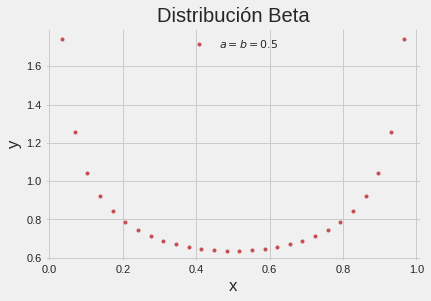

In [129]:
x_min = 0
x_max = 1

a = 0.5
b = 0.5

x = np.linspace(x_min, x_max, 30)
y = scipy.stats.beta.pdf(x, a, b)

plt.plot(x,y,'or', markersize = 3, label = '$a = b = 0.5$')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distribución Beta')
plt.grid(True)

Y la acumulada correspondiente se vería de la siguiente forma:

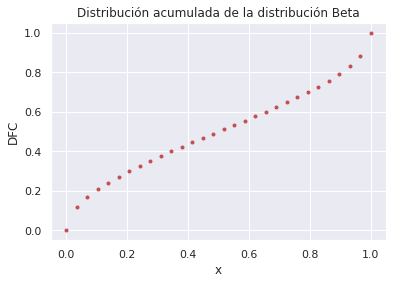

In [16]:
y_ac = scipy.stats.beta.cdf(x, a, b)
plt.plot(x,y_ac,'or', markersize = 3)
plt.xlabel('x')
plt.ylabel('DFC')
plt.title('Distribución acumulada de la distribución Beta')
plt.grid(True)

Graficamos x contra DFC:

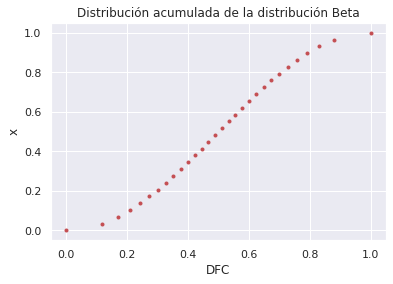

In [17]:
y_ac = scipy.stats.beta.cdf(x, a, b)
plt.plot(y_ac,x,'or', markersize = 3)
plt.xlabel('DFC')
plt.ylabel('x')
plt.title('Distribución acumulada de la distribución Beta')
plt.grid(True)

Interpolamos para obtener nuevos valores en x:

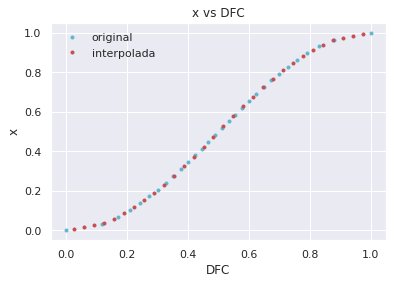

In [18]:
f = scipy.interpolate.interp1d(y_ac, x)
y_new = np.linspace(0.025,0.975,30)

x_new = f(y_new)

plt.plot(y_ac,x,'oc', markersize = 3, label = 'original')
plt.plot(y_new,x_new,'or',markersize = 3, label = 'interpolada')
plt.xlabel('DFC')
plt.legend()
plt.ylabel('x')
plt.title('x vs DFC')
plt.grid(True)

Y al plotear el histograma de los nuevos valores de x (obtenidos en la interpolación), deberíamos obtener la misma tribución beta:

Text(0, 0.5, 'y')

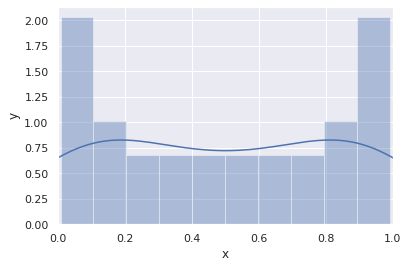

In [19]:
sns.distplot(x_new, bins = 10)
plt.xlim(0,1)
plt.xlabel('x')
plt.ylabel('y')

### **Distribución binomial**

Nuevamente, graficamos varias distribuciones binomiales utilizando sicpy (en binomial x debe ser entero):

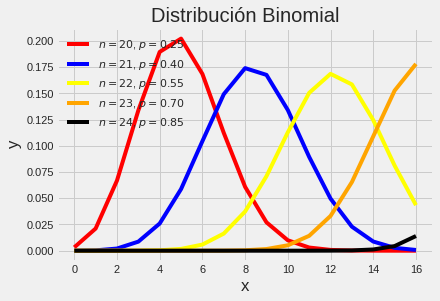

In [135]:
x_min = 0
x_max = 16

n = 20
p = 0.25

color = ['red', 'blue', 'yellow', 'orange', 'black']
labels = ['$n = 20$, $p = 0.25$', '$n = 21$, $p = 0.40$', '$n = 22$, $p = 0.55$',
         '$n = 23$, $p = 0.70$', '$n = 24$, $p = 0.85$']
for i in range(5):
    x = np.linspace(x_min, x_max, 17)
    y = scipy.stats.binom.pmf(x,n+i,p+0.15*i)
    plt.plot(x,y,'-', color = color[i], markersize = 2, label = labels[i])

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Distribución Binomial')
plt.grid(True)

Y las correspondientes distribuciones acumuladas son:

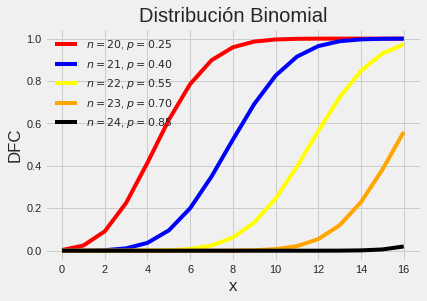

In [137]:
for i in range(5):
    x = np.linspace(x_min, x_max, 17)
    y_ac = scipy.stats.binom.cdf(x,n+i,p+0.15*i)
    plt.plot(x,y_ac,'-', color = color[i], markersize = 2, label = labels[i])

plt.xlabel('x')
plt.ylabel('DFC')
plt.legend()
plt.title('Distribución Binomial')
plt.grid(True)

La distribución binomial que analizaremos será con $n = 20$ y $p = 0.25$.

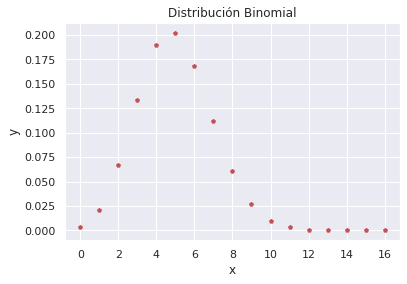

In [20]:
x_min = 0
x_max = 16

n = 20
p = 0.25

x = np.linspace(x_min, x_max, 17)
y = scipy.stats.binom.pmf(x, n, p)

plt.plot(x,y,'pr', markersize = 4)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distribución Binomial')
plt.grid(True)

Y la distribución acumulada es:

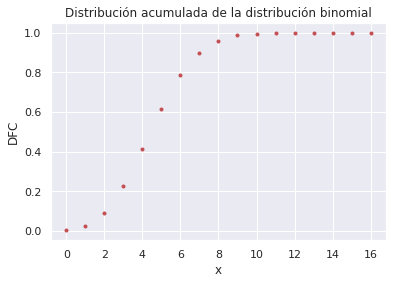

In [21]:
y_ac = scipy.stats.binom.cdf(x, n, p)
plt.plot(x,y_ac,'or', markersize = 3)
plt.xlabel('x')
plt.ylabel('DFC')
plt.title('Distribución acumulada de la distribución binomial')
plt.grid(True)

Graficamos x contra CDF:

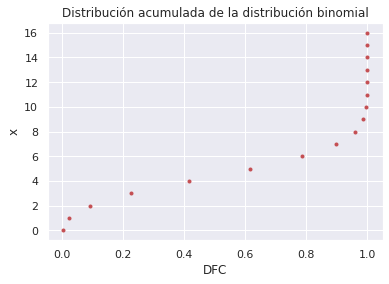

In [22]:
y_ac = scipy.stats.binom.cdf(x, n, p)
plt.plot(y_ac,x,'or', markersize = 3)
plt.xlabel('DFC')
plt.ylabel('x')
plt.title('Distribución acumulada de la distribución binomial')
plt.grid(True)

Interpolamos para obtener nuevos valores de x:

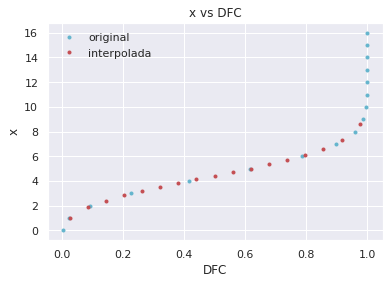

In [23]:
f = scipy.interpolate.interp1d(y_ac, x)
y_new = np.linspace(0.025,0.975,17)

x_new = f(y_new)

plt.plot(y_ac,x,'oc', markersize = 3, label = 'original')
plt.plot(y_new,x_new,'or',markersize = 3, label = 'interpolada')
plt.xlabel('DFC')
plt.legend()
plt.ylabel('x')
plt.title('x vs DFC')
plt.grid(True)

Y al plotear el histograma deberíamos de obtener una distribución binomial, muy parecida a la del inicio:

Text(0, 0.5, 'y')

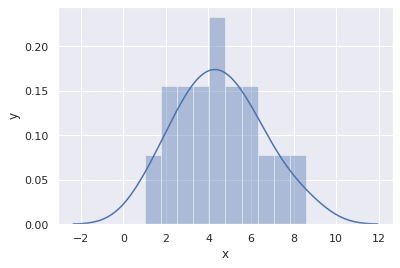

In [24]:
sns.distplot(x_new, bins = 10)
plt.xlabel('x')
plt.ylabel('y')

### **Distribución $\chi ^2$**

Utilizamos scipy para obtener la distribución de probabilidad $\chi ^2$ con valores diferentes para $k$:

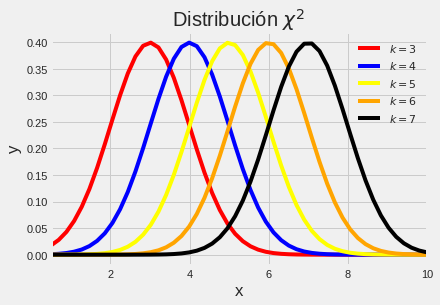

In [138]:
x_min = 0.5
x_max = 10

k = 3

color = ['red', 'blue', 'yellow', 'orange', 'black']
labels = ['$k = 3$', '$k = 4$', '$k = 5$', '$k = 6$', '$k = 7$']
for i in range(5):
    x = np.linspace(x_min, x_max, 50)
    y = scipy.stats.norm.pdf(x,k+i)
    plt.plot(x,y,'-', color = color[i], markersize = 2, label = labels[i])

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.xlim(0.5,10)
plt.title('Distribución $\chi ^2$')
plt.grid(True)

Y la distribución acumulada correspondiente es:

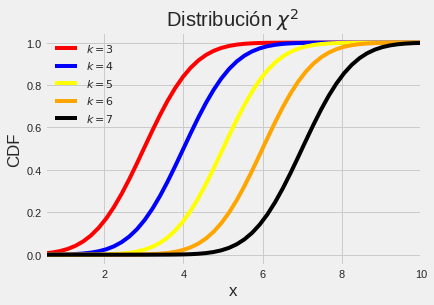

In [139]:
for i in range(5):
    x = np.linspace(x_min, x_max, 50)
    y_ac = scipy.stats.norm.cdf(x,k+i)
    plt.plot(x,y_ac,'-', color = color[i], markersize = 2, label = labels[i])

plt.xlabel('x')
plt.ylabel('CDF')
plt.legend()
plt.xlim(0.5,10)
plt.title('Distribución $\chi ^2$')
plt.grid(True)

Nos limitaremos a analizar la distribución $\chi ^2$ con $k = 3$.

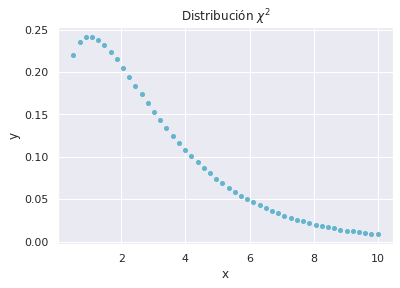

In [25]:
x_min = 0.5
x_max = 10

k = 3

x = np.linspace(x_min, x_max, 50)
y = scipy.stats.chi2.pdf(x,k)

plt.plot(x,y,'oc', markersize = 4)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distribución $\chi ^2$')
plt.grid(True)

Graficamos la distribución acumulada:

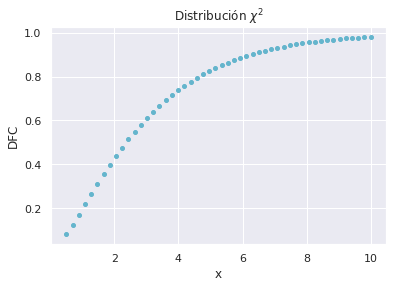

In [26]:
y_ac = scipy.stats.chi2.cdf(x,k)

plt.plot(x,y_ac,'oc', markersize = 4)
plt.xlabel('x')
plt.ylabel('DFC')
plt.title('Distribución $\chi ^2$')
plt.grid(True)

Graficamos x contra la distribución acumulada:

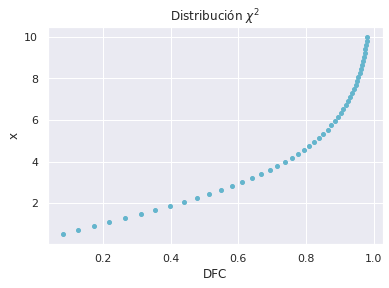

In [27]:
plt.plot(y_ac,x,'oc', markersize = 4)
plt.xlabel('DFC')
plt.ylabel('x')
plt.title('Distribución $\chi ^2$')
plt.grid(True)

Interpolamos:

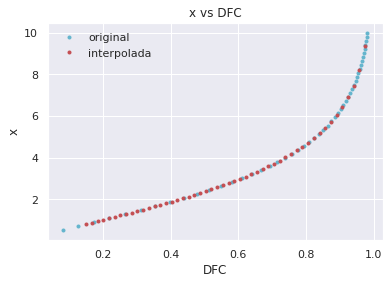

In [28]:
f = scipy.interpolate.interp1d(y_ac, x)
y_new = np.linspace(0.15,0.975,50)

x_new = f(y_new)

plt.plot(y_ac,x,'oc', markersize = 3, label = 'original')
plt.plot(y_new,x_new,'or',markersize = 3, label = 'interpolada')
plt.xlabel('DFC')
plt.legend()
plt.ylabel('x')
plt.title('x vs DFC')
plt.grid(True)

Y al plotear el histograma de x_new, regresamos a la distribución $\chi ^2$

Text(0, 0.5, 'y')

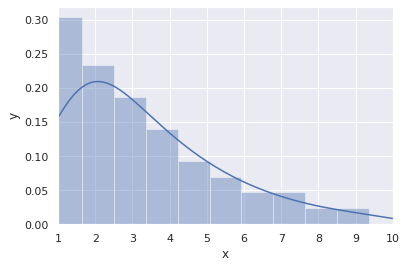

In [29]:
sns.distplot(x_new, bins = 10)
plt.xlim(1,10)
plt.xlabel('x')
plt.ylabel('y')

### **Transformation of variables**

Generamos ditribuciones uniformes para $r$ y $\theta$:

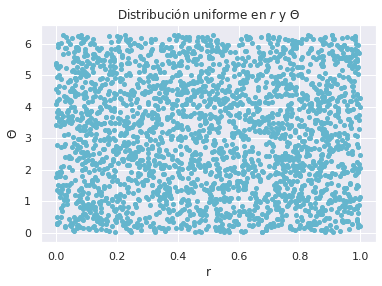

In [30]:
r = np.random.uniform(0,1,2500)
theta = np.random.uniform(0,2*np.pi,2500)

plt.plot(r,theta,'oc', markersize = 4)
plt.xlabel('r')
plt.ylabel('$\Theta$')
plt.title('Distribución uniforme en $r$ y $\Theta$')
plt.grid(True)

Y definimos x y y como $x = rcos\theta$ y $y = rsin\theta$, luego los graficamos y obtenemos una distribución no uniforme para $x$ y $y$.

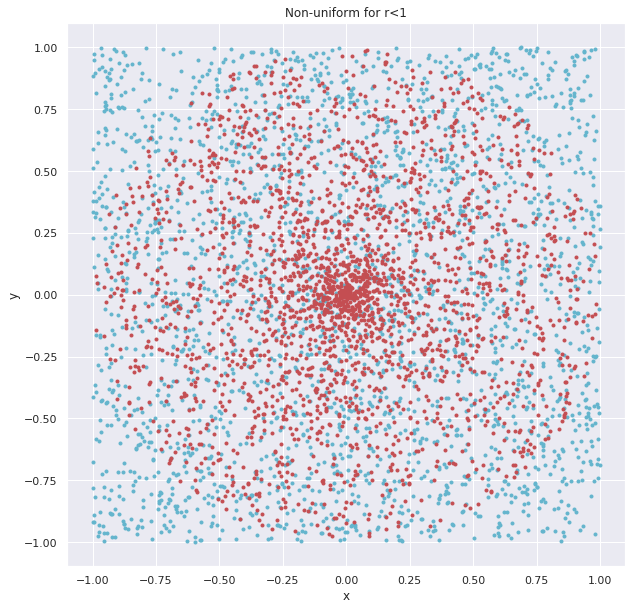

In [31]:
x = np.random.uniform(-1,1,2500)
y = np.random.uniform(-1,1,2500)

x_n = r*np.cos(theta)
y_n = r*np.sin(theta)

plt.figure(figsize = (10,10))
plt.plot(x,y,'oc', markersize = 3)
plt.plot(x_n,y_n,'or', markersize = 3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Non-uniform for r<1')
plt.grid(True)

Y en esta última puede observarse la distribución no uniforme para x y y cuando se hace la transformación.  

Sin embargo, si hacemos una distribución uniforme en $x$ y $y$ y seleccionamos sólo aquellos puntos en donde $r = \sqrt(x^2 + y^2)$ y es menor que 1 y los graficamos, se verá un círculo de radio igual a 1 con distribución uniforme de puntos:

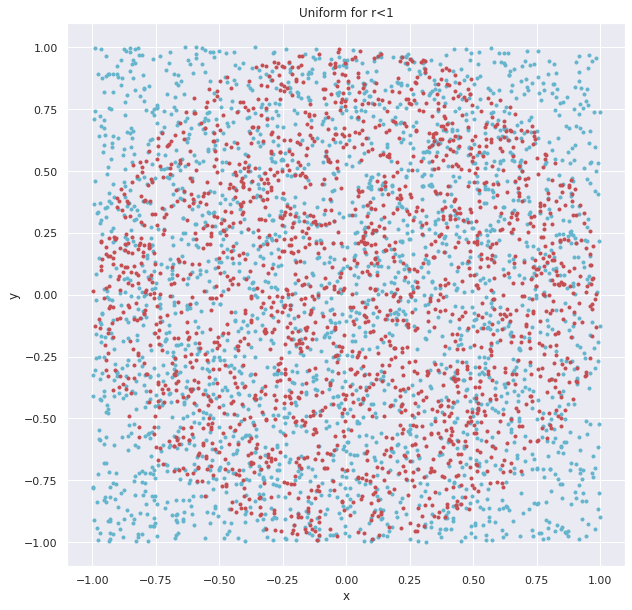

In [35]:
x = np.random.uniform(-1,1,2500)
y = np.random.uniform(-1,1,2500)

x1 = np.random.uniform(-1,1,2500)
y1 = np.random.uniform(-1,1,2500)

raiz = np.sqrt(x1**2 + y1**2)
r1 = []
theta1 = []

for i in range(2500):
    if raiz[i] <= 1.00:
        r1.append(raiz[i])
        theta1.append(math.atan2(y1[i],x1[i]))

x_new = r1*np.cos(theta1)
y_new = r1*np.sin(theta1)

plt.figure(figsize = (10,10))
plt.plot(x,y,'oc', markersize = 3)
plt.plot(x_new,y_new,'or', markersize = 3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Uniform for r<1')
plt.grid(True)

Para la gráfica 3D se hace algo similar. 
Primero generamos distribuciones uniformes para $r$, $\theta$ y $\phi$ y hacemos la transformación $x = rcos\theta sin\phi$, $y = rsen\theta sin\phi$ y $z = rcos\phi$:

In [41]:
plt.style.use('fivethirtyeight')
from mpl_toolkits import mplot3d

Text(0.5, 0.92, 'Non-uniform for r<1')

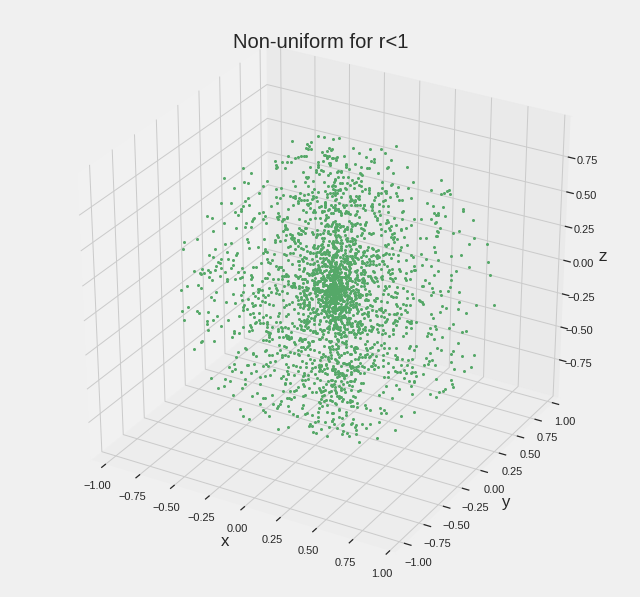

In [62]:
plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d') # Creamos los ejes para la gráfica 3D

r = np.random.uniform(0,1,2500)
theta = np.random.uniform(0,np.pi,2500)
phi = np.random.uniform(0,2*np.pi,2500)

x_t = r*np.cos(phi)*np.sin(theta)
y_t = r*np.sin(phi)*np.sin(theta)
z_t = r*np.cos(theta)

ax.plot3D(x_t, y_t, z_t, 'og', markersize = 2); # Con plot el conjunto se une en una línea

# Data for three-dimensional scattered points
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Non-uniform for r<1')
#ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Reds'); # Con scatter3D se muestran puntos.

Ahora hacemos distribuciones uniformes en $x$, $y$ y $z$, y hacemos la transformación $r = \sqrt(x^2 + y^2 + z^2)$ para r menor a 1, $\phi = arctan(y/x)$ y $\theta = \sqrt(x^2+y^2)/z$.

Text(0.5, 0.92, 'Uniform for r<1')

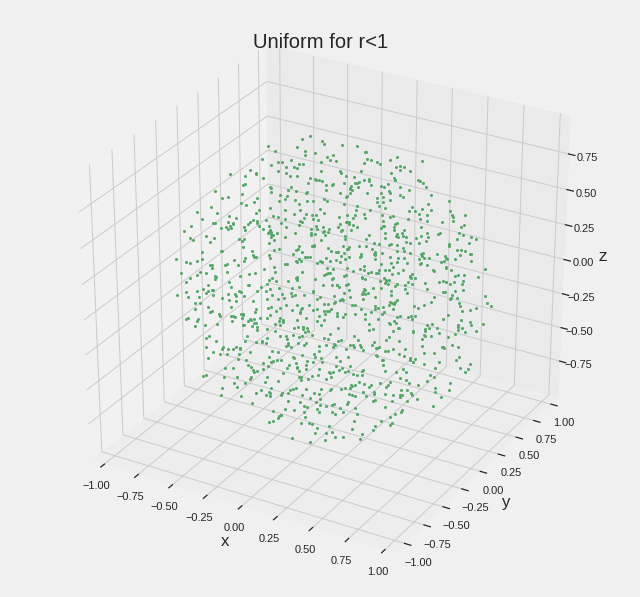

In [66]:
x = np.random.uniform(-1,1,2000)
y = np.random.uniform(-1,1,2000)
z = np.random.uniform(-1,1,2000)

raiz = np.sqrt(x**2 + y**2 + z**2)
r = []
theta = []
phi = []

for i in range(2000):
    if raiz[i] <= 1.00:
        r.append(raiz[i])
        phi.append(math.atan2(y[i],x[i]))
        theta.append(math.atan2(math.sqrt(x[i]**2+y[i]**2),z[i]))

x_new = r*np.cos(phi)*np.sin(theta)
y_new = r*np.sin(phi)*np.sin(theta)
z_new = r*np.cos(theta)

plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d') # Creamos los ejes para la gráfica 3D

ax.plot3D(x_new, y_new, z_new, 'og', markersize = 2); # Con plot el conjunto se une en una línea

# Data for three-dimensional scattered points
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Uniform for r<1')
#ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Reds'); # Con scatter3D se muestran puntos.

Exercise: 

If $y = \Phi (x) = exp(x)$ and $p(x) = 1$ for $0 \leq x \leq 1$ (a uniform distribution), what is the resultant distribution for $y$?

Solution. 

First of all, $\Phi ^{-1}(y) = \ln(y)$ for $1 \leq y \leq e$ (because when $x = 0$, $y = 1$; and when $x = 1$, $y = e$).

Also, $\frac{d\Phi ^{-1}(y)}{dy} = \frac{1}{y}$.

Thus, the resultant distribution for $y$ is $p(y) = 1(\frac{1}{y}) = \frac{1}{y}$ for $1 \leq y \leq e$, and as you can see, $\int_1^e\frac{1}{y}dy = 1$.

Primero graficamos la distribución de probabilidad de $x$.

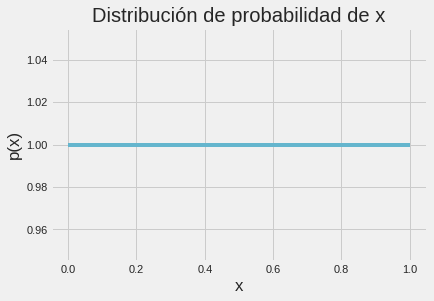

In [69]:
x = np.linspace(0,1,100)
px = np.ones(100)

plt.plot(x,px,'-c', markersize = 2)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Distribución de probabilidad de x')
plt.grid(True)

Mientras que la distribución de probabilidad de $y$ es:

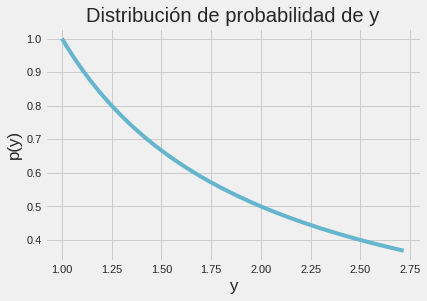

In [76]:
y = np.linspace(1,math.exp(1),100)
py = 1/y

plt.plot(y,py,'-c', markersize = 2)
plt.xlabel('y')
plt.ylabel('p(y)')
plt.title('Distribución de probabilidad de y')
plt.grid(True)

## **Análisis de datos de temperaturas en México y salarios**

### **Salarios en Guanajuato**